In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("../../..")
import evaluation_utils

In [17]:
def plot_performance(results_dir: str, model: str):
    gene_to_class_map = evaluation_utils.get_gene_to_class_map()

    alt_allele_respath = os.path.join(
        results_dir, "pearson.alternate_allele_thresholds.csv"
    )
    minor_allele_respath = os.path.join(
        results_dir, "pearson.minor_allele_thresholds.csv"
    )

    alt_allele_results = pd.read_csv(alt_allele_respath, index_col=0)
    minor_allele_results = pd.read_csv(minor_allele_respath, index_col=0)
    assert alt_allele_results.index.equals(minor_allele_results.index)

    random_split_genes = [
        g for g in alt_allele_results.index if gene_to_class_map[g] == "random_split"
    ]
    pop_split_genes = [
        g for g in alt_allele_results.index if gene_to_class_map[g] == "yri_split"
    ]
    unseen_genes = [
        g for g in alt_allele_results.index if gene_to_class_map[g] == "unseen"
    ]

    fig, axs = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

    # Alternate allele threshold results
    x = alt_allele_results.columns.astype(float)
    axs[0].plot(
        x,
        alt_allele_results.loc[random_split_genes].mean(axis=0),
        label="Random split genes",
    )
    axs[0].plot(
        x,
        alt_allele_results.loc[pop_split_genes].mean(axis=0),
        label="Population split genes",
    )
    axs[0].plot(
        x, alt_allele_results.loc[unseen_genes].mean(axis=0), label="Unseen genes"
    )
    axs[0].axvline(0.05, color="red", linestyle="--", label="5% AF")
    axs[0].set_xlabel("Alternate allele frequency cutoff")
    axs[0].set_title("Approach 1:\nset alternate allele dosage to 0 if AF < threshold")
    axs[0].legend()

    # Minor allele threshold results
    x = minor_allele_results.columns.astype(float)
    axs[1].plot(
        x,
        minor_allele_results.loc[random_split_genes].mean(axis=0),
        label="Random split genes",
    )
    axs[1].plot(
        x,
        minor_allele_results.loc[pop_split_genes].mean(axis=0),
        label="Population split genes",
    )
    axs[1].plot(
        x, minor_allele_results.loc[unseen_genes].mean(axis=0), label="Unseen genes"
    )
    axs[1].axvline(0.05, color="red", linestyle="--", label="5% AF")
    axs[1].set_xlabel("Minor allele frequency cutoff")
    axs[1].set_title(
        "Approach 2:\ntransfer minor allele dosage to major allele if AF < threshold"
    )
    axs[1].legend()

    fig.suptitle(f"Performance of linearized version of {model}\n by AF threshold")
    fig.supylabel("Pearson correlation")
    plt.tight_layout()
    plt.show()

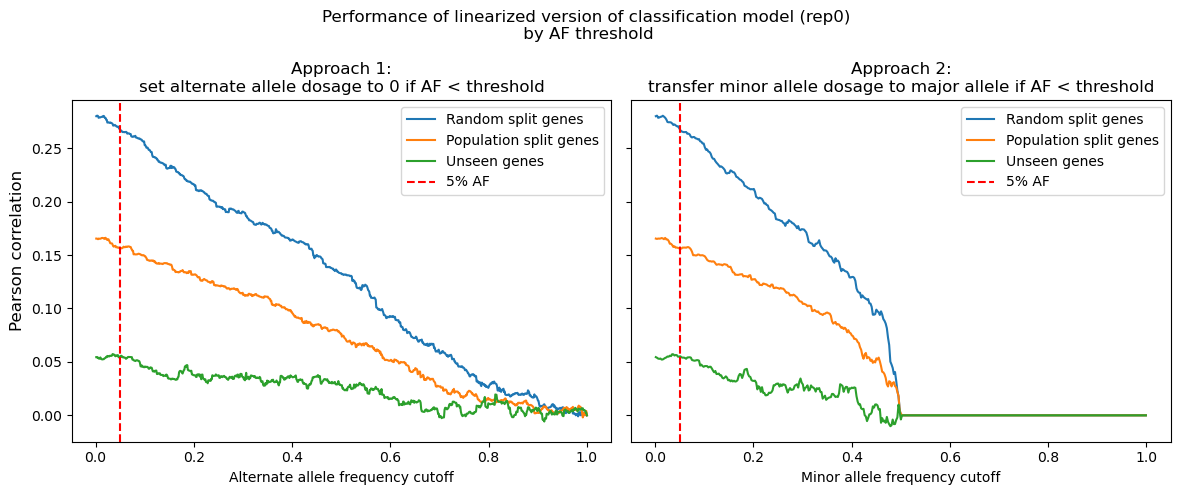

In [18]:
plot_performance("classification_rep0", "classification model (rep0)")